<a href="https://colab.research.google.com/github/SergioFCampos/Campos-Research/blob/master/Toquio_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Análise  Airbnb - **Toquio**




A AirBnB é uma empresa gigante que oferece hospedagem para milhões de pessoas ao redor do mundo. O detalhe é que , como todos sabem, a empresa não possui nenhum hotel ,nem pousadas .

"A missão da AirBnB fundamenta-se na ideia de que as pessoas são essencialmente boas e que uma comunidade é um lugar onde você possa se sentir em casa." Parte da missão por Brian Chesky -CEO e cofundador do Airbnb

**População de Toquio**

**9.273 Milhões**

1 Real = 27,21 Yens (moeda japonesa)





## Obtenção dos Dados

Os dados usados aqui são reais e foram obtidos a partir do site Inside Airbnb.

O arquivo utilizado foi um resumo de dados considerando o Tóquio.




In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
*   name - nome da propriedade anunciada
*   host_id - número de id do proprietário (anfitrião) da propriedade
*   host_name - Nome do anfitrião
*   neighbourhood_group - esta coluna não contém nenhum valor válido
*   neighbourhood - nome do bairro
*   latitude - coordenada da latitude da propriedade
*  longitude - coordenada da longitude da propriedade 
*   room_type - informa o tipo de quarto que é oferecido
*   price - preço para alugar o imóvel
*   minimum_nights - quantidade mínima de noites para reservar
*   number_of_reviews - número de reviews que a propriedade possui
*   last_review - data do último review
*   reviews_per_month - quantidade de reviews por mês
*   calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
*   availability_365 - número de dias de disponibilidade dentro de 365 dias

















Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-04-28/visualisations/listings.csv")


## Análise dos Dados


In [6]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4183,28,18,2018-07-28,0.18,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11048,3,165,2020-03-04,1.57,1,271
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4171,28,113,2020-02-17,1.18,2,241
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66443,139.65707,Entire home/apt,6952,28,103,2020-04-16,1.39,3,364
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3957,28,103,2019-10-04,1.12,2,340


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [9]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))

# verificar as variáveis de entradas do dataset
print("Varáveis:\t {} \n".format(df.shape[1]))


Entradas:	 15352
Varáveis:	 16 



In [10]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [11]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum()


id                                    0
name                                  0
host_id                               0
host_name                            11
neighbourhood_group               15352
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2610
reviews_per_month                  2610
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.170010
last_review                       0.170010
host_name                         0.000717
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

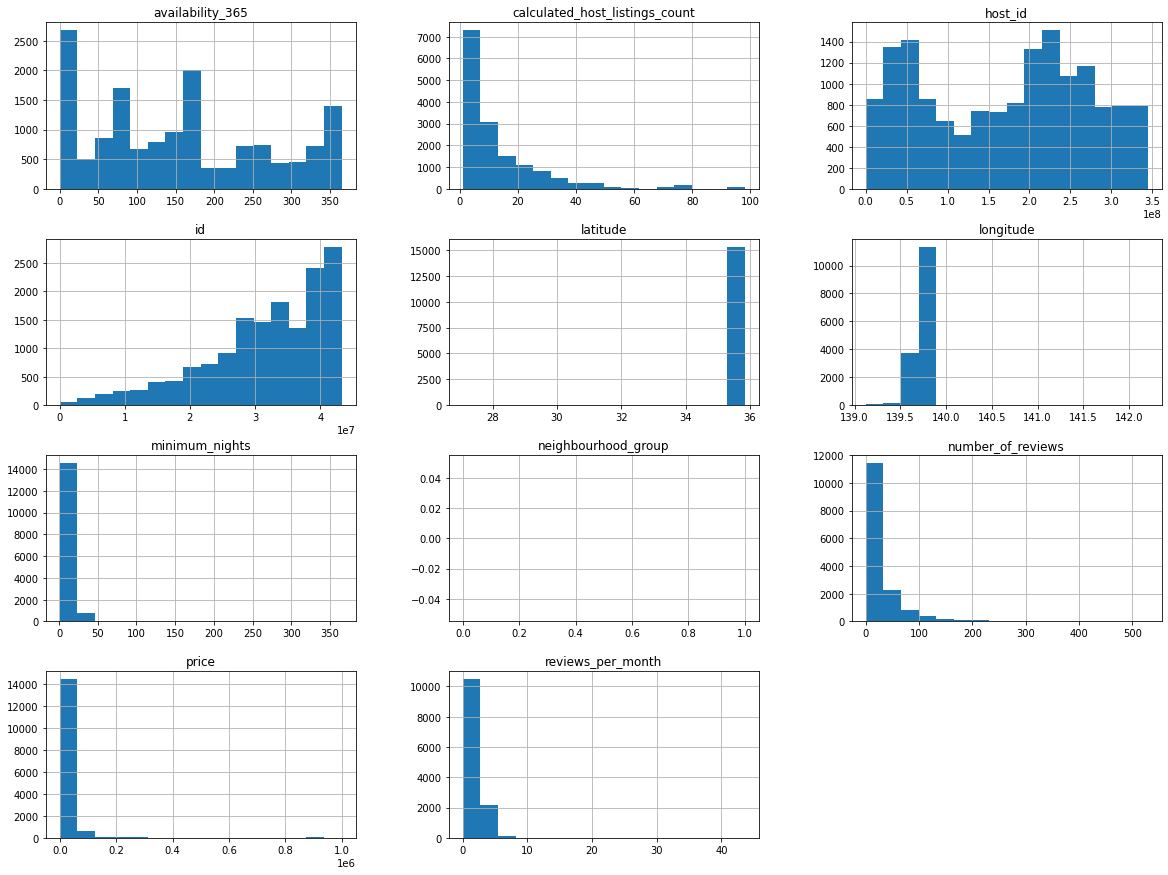

In [15]:
# plotar o histograma das variáveis numéricas

df.hist(bins=16 , figsize=(20,15));


### **Q4. Qual a média dos preços de aluguel?**

In [17]:
# ver a média da coluna `price``
df.describe()


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.535200e+04,1.535200e+04,0.0,15352.000000,15352.000000,1.535200e+04,15352.000000,15352.000000,12742.000000,15352.000000,15352.000000
mean,3.167375e+07,1.704850e+08,NaN,35.694985,139.735174,2.624158e+04,3.293968,26.542731,1.695281,13.434732,155.732348
std,9.319600e+06,9.954602e+07,NaN,0.142427,0.081392,7.636344e+04,9.114849,40.566386,1.365650,15.399161,115.567651
min,3.530300e+04,1.519770e+05,NaN,27.072330,139.123190,0.000000e+00,1.000000,0.000000,0.020000,1.000000,0.000000
25%,2.658525e+07,7.075525e+07,NaN,35.686230,139.699457,6.952000e+03,1.000000,2.000000,0.690000,3.000000,63.000000
50%,3.343554e+07,1.865996e+08,NaN,35.703020,139.728075,1.197900e+04,1.000000,11.000000,1.500000,8.000000,150.000000
75%,3.947100e+07,2.528881e+08,NaN,35.725082,139.785050,2.000100e+04,2.000000,34.000000,2.400000,18.000000,247.000000
max,4.328692e+07,3.442701e+08,NaN,35.832430,142.202880,1.000053e+06,365.000000,529.000000,43.600000,98.000000,365.000000


In [21]:
df[["availability_365","calculated_host_listings_count","minimum_nights","price"]].describe()

,availability_365,calculated_host_listings_count,minimum_nights,price
count,15352.000000,15352.000000,15352.000000,1.535200e+04
mean,155.732348,13.434732,3.293968,2.624158e+04
std,115.567651,15.399161,9.114849,7.636344e+04
min,0.000000,1.000000,1.000000,0.000000e+00
25%,63.000000,3.000000,1.000000,6.952000e+03
50%,150.000000,8.000000,1.000000,1.197900e+04
75%,247.000000,18.000000,2.000000,2.000100e+04
max,365.000000,98.000000,365.000000,1.000053e+06


## Comprovações 
**Preço**

o valor maximo do preço de aluguelpor dia é de 1.000.000 de yens, muito alto.

Considerando que 75% dos imoveis são alugados por menos de 20.000 yens- algo errado

**Minimo de noites**

A média de noites de que alguem aluga é de 3.3 noites
Portanto um máximo de 365 noites , deve estar errado

**A média do valor de aluguel é de 26.241 YENS**

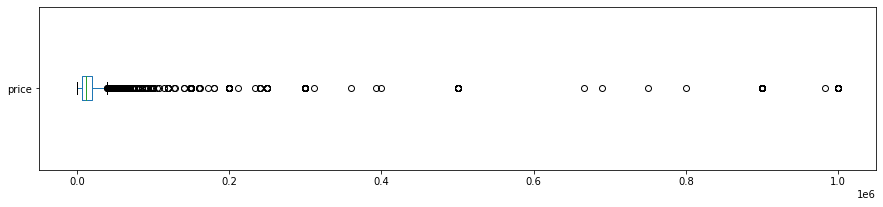

In [22]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [25]:
print("Preço: valores acima de 70000 yens:")
print("{} entradas".format(len(df[df.price > 70000])))
print("{:.4f}%".format((len(df[df.price > 70000]) / df.shape[0])*100))

Preço: valores acima de 70000 yens:
896 entradas
5.8364%


##Limpando os Outliers

In [0]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 70000].index, axis=0 , inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 15].index, axis=0, inplace = True)

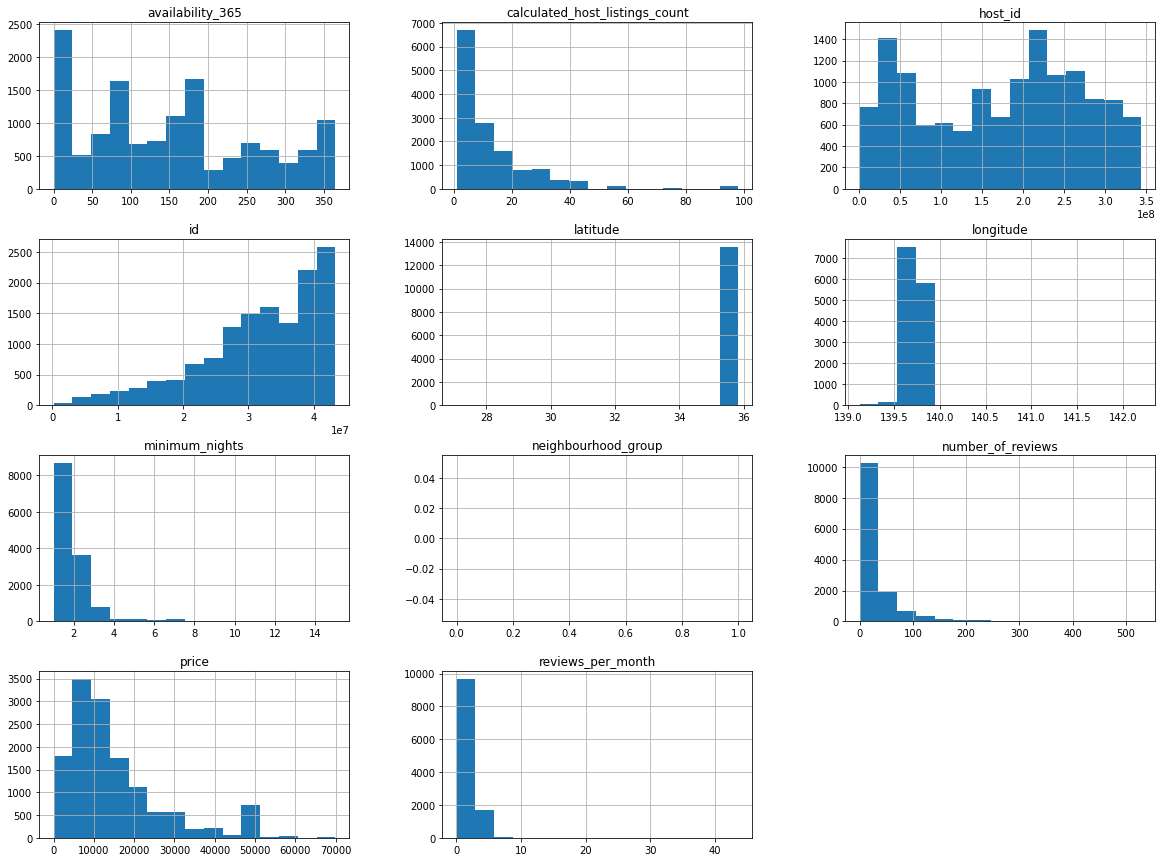

In [33]:
df_clean.hist(bins=15 ,figsize= (20,15));

##Matriz - Indices de correlação

##HeatMap

### **Q5. Qual a correlação existente entre as variáveis**

In [35]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.048924,-0.050388,0.072851,0.083028,0.061129
minimum_nights,-0.048924,1.000000,0.045449,-0.029677,-0.067616,0.007895
number_of_reviews,-0.050388,0.045449,1.000000,0.661194,-0.158944,0.023426
reviews_per_month,0.072851,-0.029677,0.661194,1.000000,-0.110646,0.032425
calculated_host_listings_count,0.083028,-0.067616,-0.158944,-0.110646,1.000000,0.064690
availability_365,0.061129,0.007895,0.023426,0.032425,0.064690,1.000000


##HeatMap

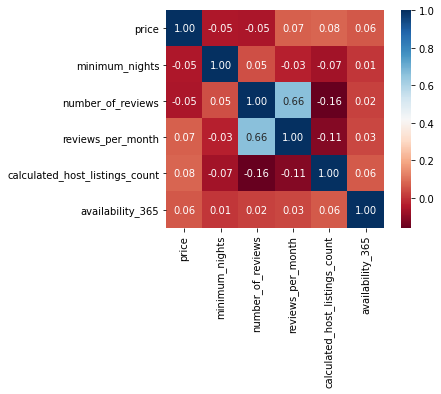

In [36]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A denominação room_type é o tipo de imovel a ser alugado que está anunciado no Airbnb.

Pode-se alugar apartamentos/casas inteiras,  quartos exclusivos e até quartos compartilhados

vamos contar?

In [37]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()


Entire home/apt    9113
Private room       3127
Shared room         708
Hotel room          676
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q7. Qual a localidade mais cara do dataset?**



In [47]:
# ver preços por bairros, na média


#df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:30]

neighbourhood
Bunkyo Ku        21590.551724
Hinohara Mura    18396.600000
Minato Ku        18093.837067
Tama Shi         17797.800000
Shinagawa Ku     17734.060241
Taito Ku         17723.154660
Shibuya Ku       17205.544276
Shinjuku Ku      16364.759484
Itabashi Ku      15511.843854
Chiyoda Ku       15452.989691
Sumida Ku        15183.097561
Miyake Mura      14963.000000
Nakano Ku        14886.007092
Fuchu Shi        14472.285714
Chuo Ku          13463.131980
Setagaya Ku      13339.282468
Toshima Ku       13236.257977
Ota Ku           13137.760563
Meguro Ku        13072.468354
Koto Ku          12930.178082
Okutama Machi    12860.400000
Mitaka Shi       12836.615385
Kita Ku          12697.759644
Arakawa Ku       12395.219219
Edogawa Ku       12384.061674
Komae Shi        12272.111111
Katsushika Ku    11871.229167
Kodaira Shi      10190.181818
Suginami Ku      10182.221477
Hachijo Machi    10011.166667
Name: price, dtype: float64

##A localidade mais cara é Bunkyo Ku com média de preços de 21.591 yens

In [48]:
df_clean["neighbourhood"].value_counts()[:20]

Shinjuku Ku      2557
Taito Ku         1985
Toshima Ku       1473
Sumida Ku        1230
Shibuya Ku        926
Ota Ku            497
Minato Ku         491
Nakano Ku         423
Chuo Ku           394
Katsushika Ku     384
Kita Ku           337
Arakawa Ku        333
Setagaya Ku       308
Itabashi Ku       301
Suginami Ku       298
Shinagawa Ku      249
Edogawa Ku        227
Koto Ku           219
Chiyoda Ku        194
Bunkyo Ku         174
Name: neighbourhood, dtype: int64

In [0]:
# plotar os imóveis pela latitude-longitude


Shinjuku Ku 2557 localidade com mais imoveis disponiveis

Bunkyo ku 20 lugar com 174

2557 / 174 = 14 vezes a relação entre a localidade com mais imóveis para a localidade que é a 20 lugar.



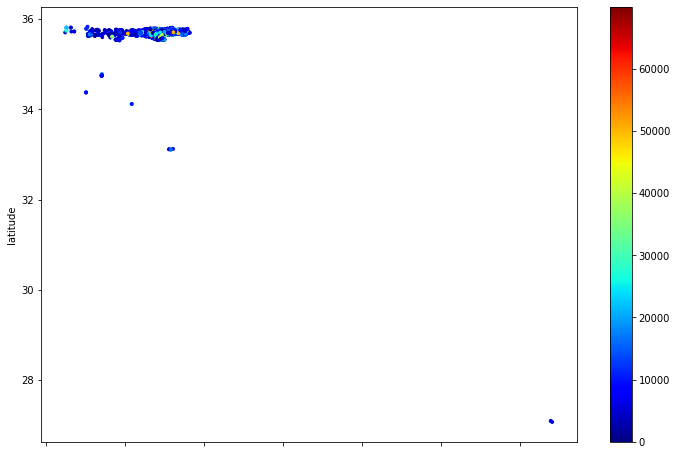

In [57]:
#df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
             # cmap=plt.get_cmap('jet'), figsize=(12,8))
df_clean.plot(kind="scatter" , x="longitude" , y="latitude",alpha=2.0, c=df_clean["price"], s=8,
              cmap=plt.get_cmap("jet"),figsize=(12,8))

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [53]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

1.6122284204345274

## Conclusões
